In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import show, output_notebook
from bokeh.layouts import column
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import layout, row
from bokeh.models import ColumnDataSource,HoverTool,Span, BoxAnnotation
from datetime import datetime
output_notebook()

Loading BokehJS ...

In [2]:
hover_price = HoverTool(
                tooltips=[
                    ('date','@date{%F}'),
                    ('price','$@{price}{0.2}'),],
                formatters={
                    '@date':'datetime',
                    '@{price}':"numeral",
                },
                mode='vline')

In [3]:
hover_change = HoverTool(
                tooltips=[
                    ('date','@date{%F}'),
                    ('change','@{change}{.0000}'),],
                formatters={
                    '@date':'datetime',
                    '@{change}':"numeral",
                },
                mode='vline')

In [4]:
sp500 = pd.read_csv("./data/GSPC_2011.csv", parse_dates=["Date"])
sp500["price_change"] = sp500["Close"].pct_change(1)+1
sp500 = sp500.dropna()

price = ColumnDataSource(data={"date":sp500["Date"], "price":sp500['Close']})
p = figure(title="SP500 Price", plot_height=300, plot_width=900, tools="xpan", toolbar_location=None,
           x_axis_type="datetime",background_fill_color="#efefef", x_range=(sp500["Date"].iloc[0], sp500["Date"].iloc[-1]))
p.line('date', 'price', source=price)
p.yaxis.axis_label = 'Price'
p.add_tools(hover_price)

price_change = ColumnDataSource(data={"date":sp500["Date"], "change":sp500['price_change']})
c = figure(title="SP500 Daily Price Change", plot_height=300, plot_width=900, tools="xpan", toolbar_location=None,
           x_axis_type="datetime",background_fill_color="#efefef", x_range=(sp500["Date"].iloc[0], sp500["Date"].iloc[-1]))

c.line('date', 'change', source=price_change)
c.yaxis.axis_label = 'Change'
c.add_tools(hover_change)

# Trading the SP500 with Reinforcement Learning

### Abstract

Can a machine learning algorithm that could outperform the stock market?
This was the question we sought to answer. To do so we trained a deep q-learning algorithm with end of day prices of the S&P 500 in 2011 to recommend favorable trades. 
Our agent managed to beat the market even though 2011 was a very volatile year for the stock market. Nevertheless the agent is not ready to be used in any real life scenario as it is way to volatile. More indicator and longer time frames are needed to train and test this model until it can be used.

### Introduction

The stock market is a game of risk and uncertainty. Every day thousands of people trade with trillions of dollar to secure profits for themselves and their clients. How will the market move next? That is the question everyone tries to answer and the lucky few that predict this consistently can make billions of dollar. This game is played with intelligence and huge amounts of data but unfortunately also a lot of emotions.    
Algorithms are build to process huge amounts of data, they are always focussed on their task, can act in milliseconds and dont have any emotions that could interfere. They are the perfect trader.

With recent advances in machine learning it seems only logical to ask if a machine learning algorithm fueled by tons of data could outperform human trader. So we started this project with the goal to build a **machine learning algorithm that could outperform the stock market**.    
The goal here was two fold. On one hand we obviously want to teach an agent to recommend profitable trades but even more important than that was to learn how machine learning and especially reinforcement learning works in general. 

The plan was to create a deep q-learning algorithm that would learn from historical timeseries data of the S&P 500 and recommend trades that, if executed would generate more profits than the S&P 500 in the same time.

### Materials and Methods

The S&P 500 is one of the most common indices containing the 500 biggest US-companies by market capitalization. We used daily closing prices (the last reported price of any trading day) from YahooFinance. There are more specialized data-provider out there with even better data but the S&P 500 is well reported and Yahoo is more than precise enough for our experiments with reinforcement learning.

The agent is trained using a Q-learning approach. We used a neural network and trained the algorithm with small baches of ten random successive trading days. Each time the algorithm chose an action that made a profit it got an reward and each time it lost money it suffered a punishement. This way the algorithm learns which actions are favorable and which are not. We used a Sequential model with three dense hidden layers which went through 300 training episodes. The agent gets ten successive data points and learns to predict the ideal action for the coming trading day. It can choose between doing nothing (“sit”), buying more (“buy”) or sell (“sell”). If the agent chooses to buy or sell it can only buy/sell one unit and it can obviously only sell what it already owns. The model only chooses action it has no concept of a budget or trading costs.


```
model = Sequential()
model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(self.action_size, activation="linear"))
model.compile(loss="mse", optimizer=Adam(lr=0.001))
```

We started to train the agent on daily data of the S&P 500 going from 2001 to 2011 but this proved simply to time intensive which is why we chose to only use data from the year 2011 for now. We chose 2011 cause we wanted to train the agent on a more complex data set, which also includes vast drawdowns instead of only a steady uptrend (which often leads to a simple buy and hold). 

There is not much data processing happening on the agent side. We normalized the closing prices and broke them into chunks of 10 data points.


### Results

Lets now speak about the results. In order to understand the underlying data on which the algorithm got trained we will go into a bit of history and show the major events happening in 2011 and how it impacted the S&P 500. 

February 15th - The first Libyan Civil War starts. Uncertainty about libyan oil production impacts the stock market.

In [5]:
start_libyan_civil_war = Span(location=datetime(2011,2,15), dimension='height', line_color='orange', line_width=1)
p.add_layout(start_libyan_civil_war)

March 11th - Earthquake of strength 9.0 hits Japan. A Tsunami kills thousands of people and leads to a catastrophe in the nuclear reactor in Fukushima. Japans economy is in a shock which has ripple effects through other markets.

In [6]:
japan_earthquake = Span(location=datetime(2011,3,11), dimension='height', line_color='purple', line_width=1)
p.add_layout(japan_earthquake)

March 15th - Exactly one month after the start of the libyan civil war the president of Bahrai declares a state of emergency in response to continous protests and mobilizes the army against them. In Syria the civil war starts. Fear of oil- and energy shortages in the US increase with conflicts in Libya, Bahrain and Syria and civil unrest in other arabic countries.

In [7]:
bahrain_syria_conflicts = Span(location=datetime(2011,3,15), dimension='height', line_color='coral', line_width=1)
p.add_layout(bahrain_syria_conflicts)

June - Debates about the second bailout for greece lead to more and more uncertainty in the markets about the future of greece, europe and the euro.

In [8]:
greek_baylout_debates = BoxAnnotation(left=datetime(2011,5,31), right=datetime(2011,6,29), fill_color='blue', fill_alpha=0.1)
p.add_layout(greek_baylout_debates)

June 29th - The third credit package for greece is confirmed. With it are huge austerity measures coming for greece and the greek public. 

In [9]:
credit_greece = Span(location=datetime(2011,6,29), dimension='height', line_color='green', line_width=1)
p.add_layout(credit_greece)

August 5th - High debt and major difficulties regarding the US-Budget cause the US credit rating to drop from AAA to AA+. This is the first time since 1941 that the US doesn't count as AAA.

In [10]:
us_credit_downgrade = Span(location=datetime(2011,8,5), dimension='height', line_color='red', line_width=1)
p.add_layout(us_credit_downgrade)

August till December - The US stock market is in a major crisis fueled by the european debt crisis and fear about its effect on the us economy. Occupy Wall Street starts their protests in september. The rest of the the year is marked by uncertainty, doubt and fear. Each uptrend gets wiped out quickly and drastically. The market can recover a bit to the end of the year.

September 19th - Italian credit gets downgrade from A+ to A. This is a major hit for many banks after they lend billions to stabilize the country

In [11]:
italian_credit_downgrade = Span(location=datetime(2011,9,19), dimension='height', line_color='red', line_width=1)
p.add_layout(italian_credit_downgrade)

[1]

In [12]:
show(column(p, c))

**Figure 1: The SP500 Price** shows the daily closing price of the S&P 500 in the year 2011. Colored lines or areas show historic events.    
**Figure 2: The SP500 Daily Price Change** tells us the daily change of price in percent.

Now that we know what happend in 2011 and how the market reacted, lets look at how our agent performed in this environment. We will first look into the actions it chose. Following this we will dissect the chosen trades and analyze the performance of it. We will conclude our results with an analysis of the viability of those recommendations.

In [13]:
dqn = pd.read_csv("./data/dqn_model.csv", parse_dates=["Date"])
dqn["Strategy"] = dqn["Profits"].cumsum()
dqn["Return_perc"] = dqn["Profits"]/dqn["Price"] + 1

buys = dqn[dqn["Action"] == "Buy"][["Date", "Price"]]
sells = dqn[dqn["Action"] == "Sell"][["Date", "Price"]]

In [14]:
p2 = figure(title="SP500 DQN Trading Agent", plot_height=300, plot_width=900, toolbar_location=None,
           x_axis_type="datetime",background_fill_color="#efefef", x_range=(dqn["Date"].iloc[0], dqn["Date"].iloc[-1]))
p2.line('date', 'price', source=price)
p2.yaxis.axis_label = 'Price'
p2.circle(buys["Date"],buys["Price"], size=5, color="green")
p2.circle(sells["Date"],sells["Price"], size=5, color="red")
show(p2)

**Figure 3:** Here we can see which action the algorithm chose. Green dots are buys and red dots show sells.

This looks overall quite reasonable. Not too much sticks out. Sure, here and there are some sell signals at local minima and buys at local maxima but it does not seem to extreme. So lets look a bit more into it. What did the agent actually do?

The agent sits a bit more than half ot the time just idle. Buys and Sells are even which makes sense. We did not sell more than we had and at the end of the year all our positions are closed. 

In [15]:
dqn['Action'].value_counts()

Sit     130
Sell     61
Buy      61
Name: Action, dtype: int64

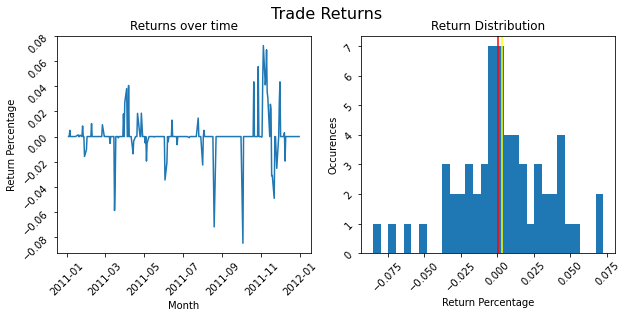

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
fig.suptitle('Trade Returns', size=16)
ax1.plot(dqn["Date"],dqn["Return_perc"]-1)
ax1.set_title("Returns over time")
ax1.set_xlabel("Month")
ax1.set_ylabel("Return Percentage")
ax1.tick_params(labelrotation=45)

ax2.hist(dqn[dqn["Return_perc"] != 1.0]["Return_perc"]-1, bins=30)
ax2.axvline((dqn[dqn["Action"] == "Sell"]["Return_perc"]-1).median(), color="red", label="median")
ax2.axvline((dqn[dqn["Action"] == "Sell"]["Return_perc"]-1).mean(), color="yellow", label="mean")
ax2.set_xlabel("Return Percentage")
ax2.set_ylabel("Occurences")
ax2.tick_params(labelrotation=45)
ax2.set_title("Return Distribution")
plt.show()

**Figure 4: Returns over time** shows the return percentage of each trade and when they occured.    
**Figure 5: Return Distribution** shows the distribution of returns per trade.

As we can see in Figure 4 and 5 most trades only have a marginal impact. The whole Strategy is only really impacted by a few dramatic trades. Our median is pretty close to zero and the average return is only 0.28% (red and yellow line in Figure 5).   
Our best trade scores 7.25% but the worst trade costs -8.5%. Figure 1 shows nicely that a majority of time is relatively calm. We are either not trading or just getting minor profits/losses. All these average trades are dwarfed by our few big movers.

But how does this compare to buying and holding the S&P 500 in 2011?

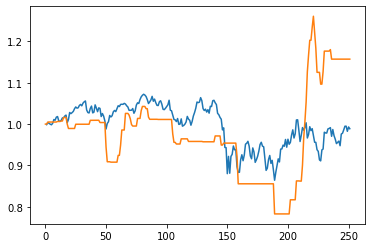

In [17]:
sp500["price_change"].cumprod().plot()
dqn["Return_perc"].cumprod().plot()
plt.show()

**Figure 6:** This plot shows the returns in percent of the S&P 500 versus our algorithm. The orange line is our algorithm and the blue line shows the S&P 500.

Actually surprisingly good. If we would have followed the recommendations of our agent we would have made 15.7% instead of losing 1.2% in the S&P 500. Sounds great doesn't it?    
Not so fast. While at the end of the year we would have potentially made more money than by folloing the Index it is very unrealistic that anyone would have gotten to that place. After seeing the agent recommending bad trade after bad trade and beeing permantly worse performaning than the index, only the most stubborn trader could still follow these recommendations.
At the lowest point the S&P 500 is down 13.6% against its inital price in january. Our agent though is down 27.8% on its worst point. 

In [18]:
print(f'SP500 Worst: {round(sp500["price_change"].cumprod().min()-1,3)}')
print(f'Agent Worst: {round(dqn["Return_perc"].cumprod().min()-1,3)}')

SP500 Worst: -0.136
Agent Worst: -0.217


The S&P 500 is also very limited in its upside with only a maximum gain of 7.2% while our agent delivers 26.1%.

In [19]:
print(f'SP500 Best: {round(sp500["price_change"].cumprod().max()-1,3)}')
print(f'Agent Best: {round(dqn["Return_perc"].cumprod().max()-1,3)}')

SP500 Best: 0.072
Agent Best: 0.261


And thats how we come to one of the biggest problems with the algorithm. Its is way to volatile, even more so than the S&P 500 in a very volatile year. From the lowest point to its highest the agent more than doubles its return. But even the large trades in between are to volatile. 

It should be clear by now that the agent in its current form doesnt give recommendations that could be applied in any real life scenario.

### Discussion

2011 was a turbulent year, the beginning of the arab spring, an oil crisis, the european debt crisis and and it was the first time since 1941 that the US credit score dropped below AAA. The S&P 500 closes with a loss of 1.2% from its inital price at the start of the year. Nonetheless our agent made 15.7% in this environment.    
These returns are unfortunately not actionable. Most of the year our algorithm performs worse than the S&P 500 and only to the end of the year we gain all our profits in a few great trades. Our agents recommendations result in not only a strategy that is way to volatile but even those huge gains could simply be a result of luck. 

It is hereby important to put this into context. We only used data from 2011, 300 training episodes and only closing prices. No indicator or other complementary timeseries. I am therefore very optimistic that this result could be improved by quite a bit.

There are big Hedge Funds that rely exclusively on machine learning algorithms to generate their profits. It makes sense, machines are better at processing huge amounts of data and dont have any emotions that could interfere. But it also makes sense that these successful algorithms are not easy to implement. If that would be the case none of those firms would need a fast staff of researcher and developer. 

We can now answer our question if a reinforcement learning algorithm can beat the market. Yes it can, but it still takes a lot of work to make the algorithm reliably and consistent to the degree that it can be actually used in the stock market.

Leon Niesler, 13.04.2020

## References

[1] https://de.wikipedia.org/wiki/2011